In [1]:
import pandas as pd
import numpy as np

In [2]:
calif_house = pd.read_csv('califonia_housing.csv')
calif_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Exploratory Data Analysis

In [3]:
for col in calif_house.columns:
    print(col)
    print(calif_house[col].unique()[:5])
    print(calif_house[col].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

ocean_proximity
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
5



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

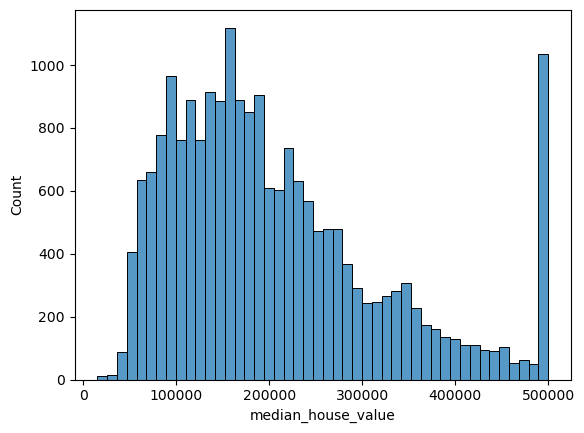

In [5]:
sns.histplot(calif_house.median_house_value )

In [6]:
np.log1p([0, 5, 50, 5000, 500000])

array([ 0.        ,  1.79175947,  3.93182563,  8.51739317, 13.12236538])

In [7]:
price_logs = np.log1p(calif_house.median_house_value)

<Axes: xlabel='median_house_value', ylabel='Count'>

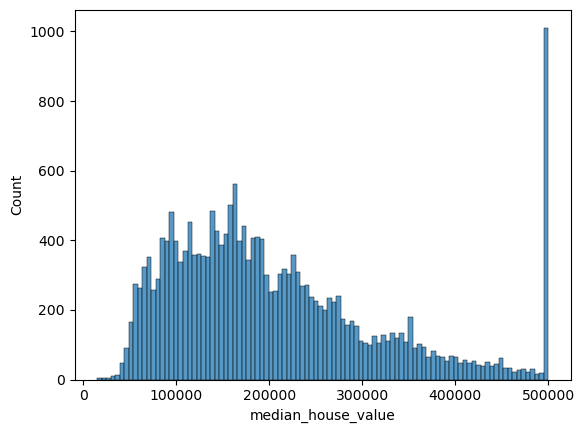

In [8]:
sns.histplot(calif_house.median_house_value, bins=100 )

# 1H OCEAN AND INLAND SUBSET OF OCEAN_PROXIMITY

In [9]:
df= calif_house[
    (calif_house['ocean_proximity'] == '<1H OCEAN') | (calif_house['ocean_proximity'] == 'INLAND')
]

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
df = df[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


# Question 1 total_bedrooms

In [11]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2 50% = 1195

In [12]:
df.population.median()

1195.0

# shuffle dataset

In [13]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_train, n_val, n_test

(9413, 3137, 3137)

In [14]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [15]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 15684, 15685, 15686])

In [16]:
np.random.seed(42)
np.random.shuffle(idx)

In [17]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [18]:
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [19]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
20157,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080,297900.0
20005,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,40900.0
6691,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546,500001.0
3470,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526,183300.0


In [20]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.02,-120.09,9.0,1608.0,297.0,1057.0,295.0,3.7143,81600.0
1,33.84,-117.88,34.0,1410.0,214.0,837.0,240.0,6.1168,213900.0
2,33.95,-118.21,32.0,1116.0,328.0,1265.0,302.0,2.2950,155200.0
3,36.32,-119.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,87700.0
4,33.14,-117.11,10.0,3208.0,636.0,1395.0,582.0,3.4455,190500.0
...,...,...,...,...,...,...,...,...,...
3132,36.07,-119.02,29.0,2610.0,597.0,1659.0,571.0,1.5911,60800.0
3133,40.03,-122.10,25.0,2516.0,NaN,1266.0,494.0,1.7566,58400.0
3134,34.00,-118.04,30.0,5308.0,854.0,2114.0,838.0,5.1985,279200.0
3135,34.10,-118.15,36.0,3514.0,818.0,2277.0,828.0,3.1211,229300.0


# Apply log transformation

In [22]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [23]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [24]:
len(y_train)

9413

# Question 3 - Both are equally good
### both 0 and mean give better RMSE

In [25]:
df.total_bedrooms.isnull().sum()

157

In [26]:
df.total_bedrooms.fillna(0)

701       194.0
830       711.0
859       783.0
860       597.0
861      1031.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 15687, dtype: float64

In [27]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [28]:
df_train.dtypes

latitude              float64
longitude             float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object

In [29]:
X_train = df_train[base].values

In [30]:
X_train = df_train[base].fillna(0).values

In [31]:
y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

# Training the linear regression model

In [32]:
w0, w = train_linear_regression(X_train, y_train)

In [33]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

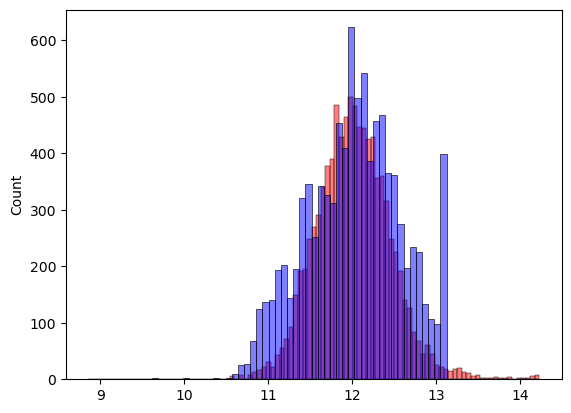

In [34]:
sns.histplot(y_pred, color="red", alpha=0.5)
sns.histplot(y_train, color="blue", alpha=0.5)

# Using Validation dataset to evaluate the model 
### RMSE

In [35]:
rmse(y_train, y_pred)

0.34027197158295336

In [36]:
#validation dataset to evaluate model
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

0.34

# Using mean value to fill missing number

In [37]:
df_train.total_bedrooms.isnull().sum()
df_train.total_bedrooms = df_train.total_bedrooms.fillna(df_train.total_bedrooms.mean())

In [38]:
#using mean value to fill
X_train = df_train[base].fillna(df_train.total_bedrooms.mean()).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

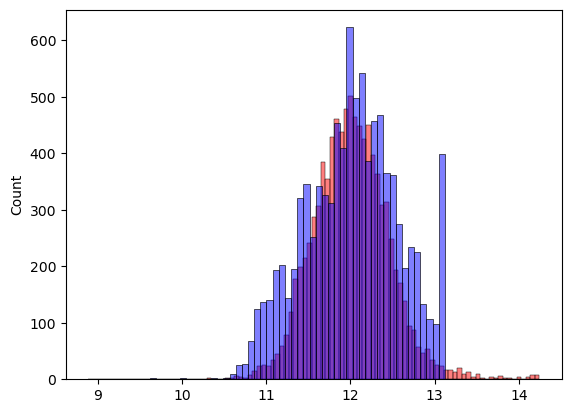

In [39]:
sns.histplot(y_pred, color="red", alpha=0.5)
sns.histplot(y_train, color="blue", alpha=0.5)

In [40]:
score = rmse(y_train, y_pred)
round(score, 2)

0.34

In [41]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

0.34

# Question 4 r = 0 gives the best RMSE

In [42]:
df_train.total_bedrooms = df_train.total_bedrooms.fillna(0)
df_train.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [43]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [44]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    round(score, 2)
    
    print(r, w0, round(score, 2))

0 -9.886133216346906 0.34
1e-06 -9.88611221928517 0.34
0.0001 -9.88403396171016 0.34
0.001 -9.865180702768187 0.34
0.01 -9.68052869555353 0.34
0.1 -8.15417116352722 0.34
1 -3.16331818126116 0.35
5 -0.8483447453373295 0.35
10 -0.44183186823943815 0.35


# Question 5 
### std = 0.005

In [45]:
rmse_scores = []

In [46]:
# seeds
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    
    # split data 
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    # fill with 0
   # df_train = df_train.fillna(0).values
    
    # train
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    # validate
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    # RMSE
    score = round(rmse(y_val, y_pred), 3)
    rmse_scores.append(score)
    
    print('seed = {}, RMSE = {}'.format(seed, score))


seed = 0, RMSE = 0.332
seed = 1, RMSE = 0.342
seed = 2, RMSE = 0.344
seed = 3, RMSE = 0.342
seed = 4, RMSE = 0.339
seed = 5, RMSE = 0.341
seed = 6, RMSE = 0.337
seed = 7, RMSE = 0.341
seed = 8, RMSE = 0.336
seed = 9, RMSE = 0.336


In [47]:
std = np.std(rmse_scores)
round(std, 3)

0.003

In [48]:
np.random.seed(9)
    
# split data 
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [49]:
# combine training and valiidation dataset
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])

In [50]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [51]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score, 2)

0.34

In [52]:
house = df_test.iloc[3].to_dict()
house

{'latitude': 34.04,
 'longitude': -117.18,
 'housing_median_age': 41.0,
 'total_rooms': 1766.0,
 'total_bedrooms': 288.0,
 'population': 753.0,
 'households': 278.0,
 'median_income': 4.9125,
 'median_house_value': 140700.0}

In [53]:
df_small = pd.DataFrame([house])
df_small

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,34.04,-117.18,41.0,1766.0,288.0,753.0,278.0,4.9125,140700.0


In [54]:
X_small = prepare_X(df_small)

y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

12.07371073710863

In [55]:
np.expm1(y_pred)

175203.7794553508

In [56]:
np.expm1(y_test[3])

140699.9999999999